# Задание 1.

Решить задачу классификации для выбранного набора данных с http://keel.es/

In [156]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Конвертация в csv

In [157]:
csv_header = "Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class\n"

with open("adult.dat", "r") as f:
    lines = f.readlines()
with open("adult.csv", "w") as f:
    f.write(csv_header)
    for line_number, line in enumerate(lines):
        if (line_number >= 19):
            f.write(line)

# Препроцессинг

In [158]:
df = pd.read_csv('adult.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [159]:
df.replace('?', np.nan, inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  Native-country  47985 non-null  object
 14  Class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [161]:
df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [162]:
df.isna().sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
Class                0
dtype: int64

In [163]:
df.dropna(inplace=True)

In [164]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Class             0
dtype: int64

In [165]:
features = df.drop(['Education', 'Class'], axis=1)
target = df['Class']
print(f"Столбцы: {features.columns}")
print(f"Размер features: {features.shape}")
print(f"Размер target: {target.shape}")

Столбцы: Index(['Age', 'Workclass', 'Fnlwgt', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hours-per-week', 'Native-country'],
      dtype='object')
Размер features: (45222, 13)
Размер target: (45222,)


In [166]:
df_classes = df['Class'].value_counts()
print(f'Коэффициент дисбаланса: {df_classes.max() / df_classes.min()}')

Коэффициент дисбаланса: 3.034796573875803


Проверка на дисбаланс классов

In [167]:
target.value_counts()

<=50K    34014
>50K     11208
Name: Class, dtype: int64

In [168]:
target = target.map({'<=50K': 0, '>50K': 1})

In [169]:
target.value_counts()

0    34014
1    11208
Name: Class, dtype: int64

Нормализация данных

In [170]:
from sklearn.preprocessing import MinMaxScaler

columns = features.columns
num_col = list(features.select_dtypes(include='number').columns)
print(f"Столбцы с числами: {num_col}")
scaler = MinMaxScaler()
features[num_col] = scaler.fit_transform(features[num_col])

Столбцы с числами: ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']


Добавление фиктивных переменных

In [171]:
features = pd.get_dummies(features)

In [172]:
features.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0.232877,0.125398,0.333333,0.000000,0.0,0.295918,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
target.head()

0    0
1    0
2    1
3    1
5    0
Name: Class, dtype: int64

Разделение данных на тестовую и обучающую выборки

In [174]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
                        features,
                        target,
                        train_size=0.75,
                        random_state=50)

In [175]:
print(features_train.shape,
      features_test.shape,
      target_train.shape,
      target_test.shape)

(33916, 88) (11306, 88) (33916,) (11306,)


### Выводы
* Столбец 'Education' удалён, так как он дублируется столбцом 'Education-num'
* Удалены пропущенные значения, так как предсказать категориальные фичи очень сложно и их не особо много
* Переведены категориальные переменные в фиктивные признаки

# Обучение с помощью Catboost

In [176]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [177]:
model = CatBoostClassifier(depth=5,
                           iterations=50,
                           learning_rate=0.01,
                           auto_class_weights='Balanced')
model.fit(features_train, target_train)
predict = model.predict(features_test)

report = classification_report(target_test, predict)
print(report)

C:\Users\alexander\anaconda3\envs\DataScience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6860260	total: 17.3ms	remaining: 847ms
1:	learn: 0.6782028	total: 34.4ms	remaining: 825ms
2:	learn: 0.6709733	total: 49.8ms	remaining: 780ms
3:	learn: 0.6644347	total: 65ms	remaining: 748ms
4:	learn: 0.6579911	total: 80.1ms	remaining: 721ms
5:	learn: 0.6510735	total: 95.2ms	remaining: 698ms
6:	learn: 0.6443341	total: 111ms	remaining: 682ms
7:	learn: 0.6383489	total: 125ms	remaining: 657ms
8:	learn: 0.6329386	total: 140ms	remaining: 636ms
9:	learn: 0.6275516	total: 155ms	remaining: 620ms
10:	learn: 0.6220939	total: 168ms	remaining: 595ms
11:	learn: 0.6165887	total: 181ms	remaining: 574ms
12:	learn: 0.6111545	total: 197ms	remaining: 561ms
13:	learn: 0.6061415	total: 217ms	remaining: 559ms
14:	learn: 0.6015843	total: 242ms	remaining: 566ms
15:	learn: 0.5969881	total: 260ms	remaining: 552ms
16:	learn: 0.5923441	total: 275ms	remaining: 535ms
17:	learn: 0.5883208	total: 290ms	remaining: 515ms
18:	learn: 0.5841665	total: 305ms	remaining: 498ms
19:	learn: 0.5793006	total: 325ms	rem

[[0.75557643 0.24442357]
 [0.13450502 0.86549498]]


C:\Users\alexander\anaconda3\envs\DataScience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


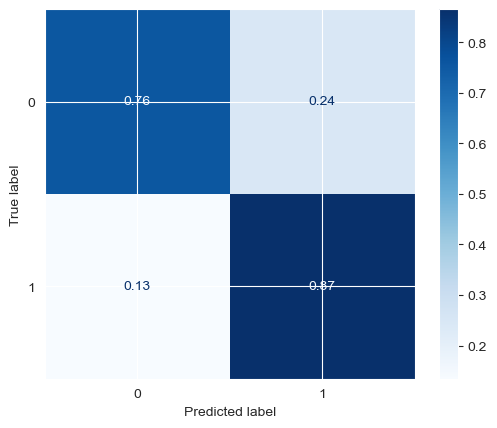

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    features_test,
    target_test,
    cmap=plt.cm.Blues,
    normalize='true')
print(disp.confusion_matrix)

### Вывод:
Анализируя метрики recall и precision для положительного класса имеет место большая чувствительность модели к положительному классу, хотя они на самом деле являются отрицательными (precision = 0.54), то есть модель переобучается на положительном классе